<a href="https://colab.research.google.com/github/varshin99/assignment-data-challenge/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datasets for the Logistic Regression and KNN



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification, make_circles,make_blobs
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_moons, make_circles, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

**DATASET1**

In [2]:
seed = 42  # Set a seed for reproducibility

# Create non-linear data with two features using make_circles
# This creates a dataset with a circular pattern
X, y = make_circles(n_samples=5000, noise=0.5, factor=0.4, random_state=seed)

# Instantiate PolynomialFeatures to create new feature interactions
# This expands the feature set by adding polynomial terms (squared terms in this case)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features from the original features
# This will help in capturing interactions between features
X_poly = poly.fit_transform(X)

# Generate additional noise features to increase the complexity of the dataset
# This introduces randomness and makes the dataset more challenging for certain classifiers
np.random.seed(seed)  # Set the seed again for consistent noise generation
noise_features = np.random.randn(5000, 17)  # Generate 17 random noise features

# Combine the polynomial features and noise features
# This results in a dataset that combines both meaningful and random features
X_expanded = np.hstack((X_poly, noise_features))

# Create a DataFrame from the expanded feature set
# This makes the data easier to handle and save as a CSV file
df_expanded = pd.DataFrame(X_expanded)
df_expanded['label'] = y  # Add the labels to the DataFrame

# Save the dataset with more features to a CSV file
# This file can be used for further analysis or machine learning tasks
df_expanded.to_csv("Dataset1.csv", index=False)


**EDA**

In [17]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   float64
 22  

In [3]:
df_expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,label
0,0.148668,-0.157740,0.022102,-0.023451,0.024882,0.496714,-0.138264,0.647689,1.523030,-0.234153,...,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0
1,0.530002,-0.627882,0.280903,-0.332779,0.394236,0.314247,-0.908024,-1.412304,1.465649,-0.225776,...,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278,-0.013497,-1.057711,1
2,0.471800,0.257520,0.222595,0.121498,0.066316,0.822545,-1.220844,0.208864,-1.959670,-1.328186,...,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0.324084,1
3,-0.981611,0.787188,0.963561,-0.772712,0.619665,-0.385082,-0.676922,0.611676,1.031000,0.931280,...,0.975545,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0
4,0.361243,0.570653,0.130496,0.206144,0.325645,0.361636,-0.645120,0.361396,1.538037,-0.035826,...,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270,-0.808494,0


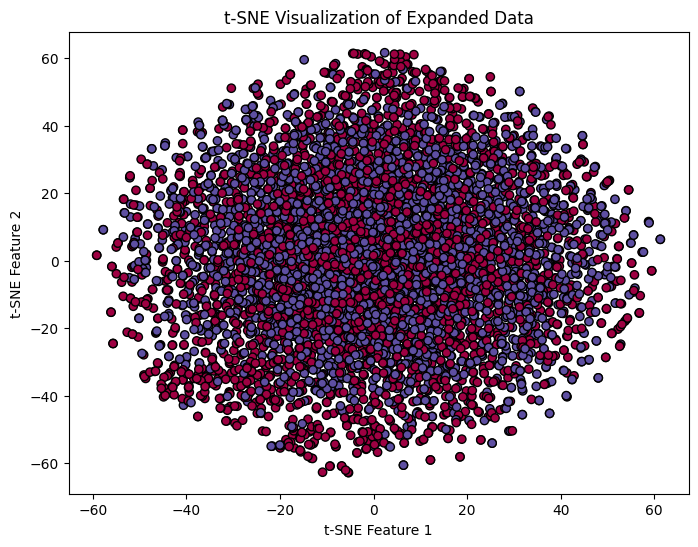

In [4]:
# Initialize t-SNE and reduce the dimension of the expanded dataset
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_expanded)

# Visualize the t-SNE-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("t-SNE Visualization of Expanded Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()


I have used tnse to reduce the dimensionality so that visulaisation can bee seen in 2D the the dataset had 21 features

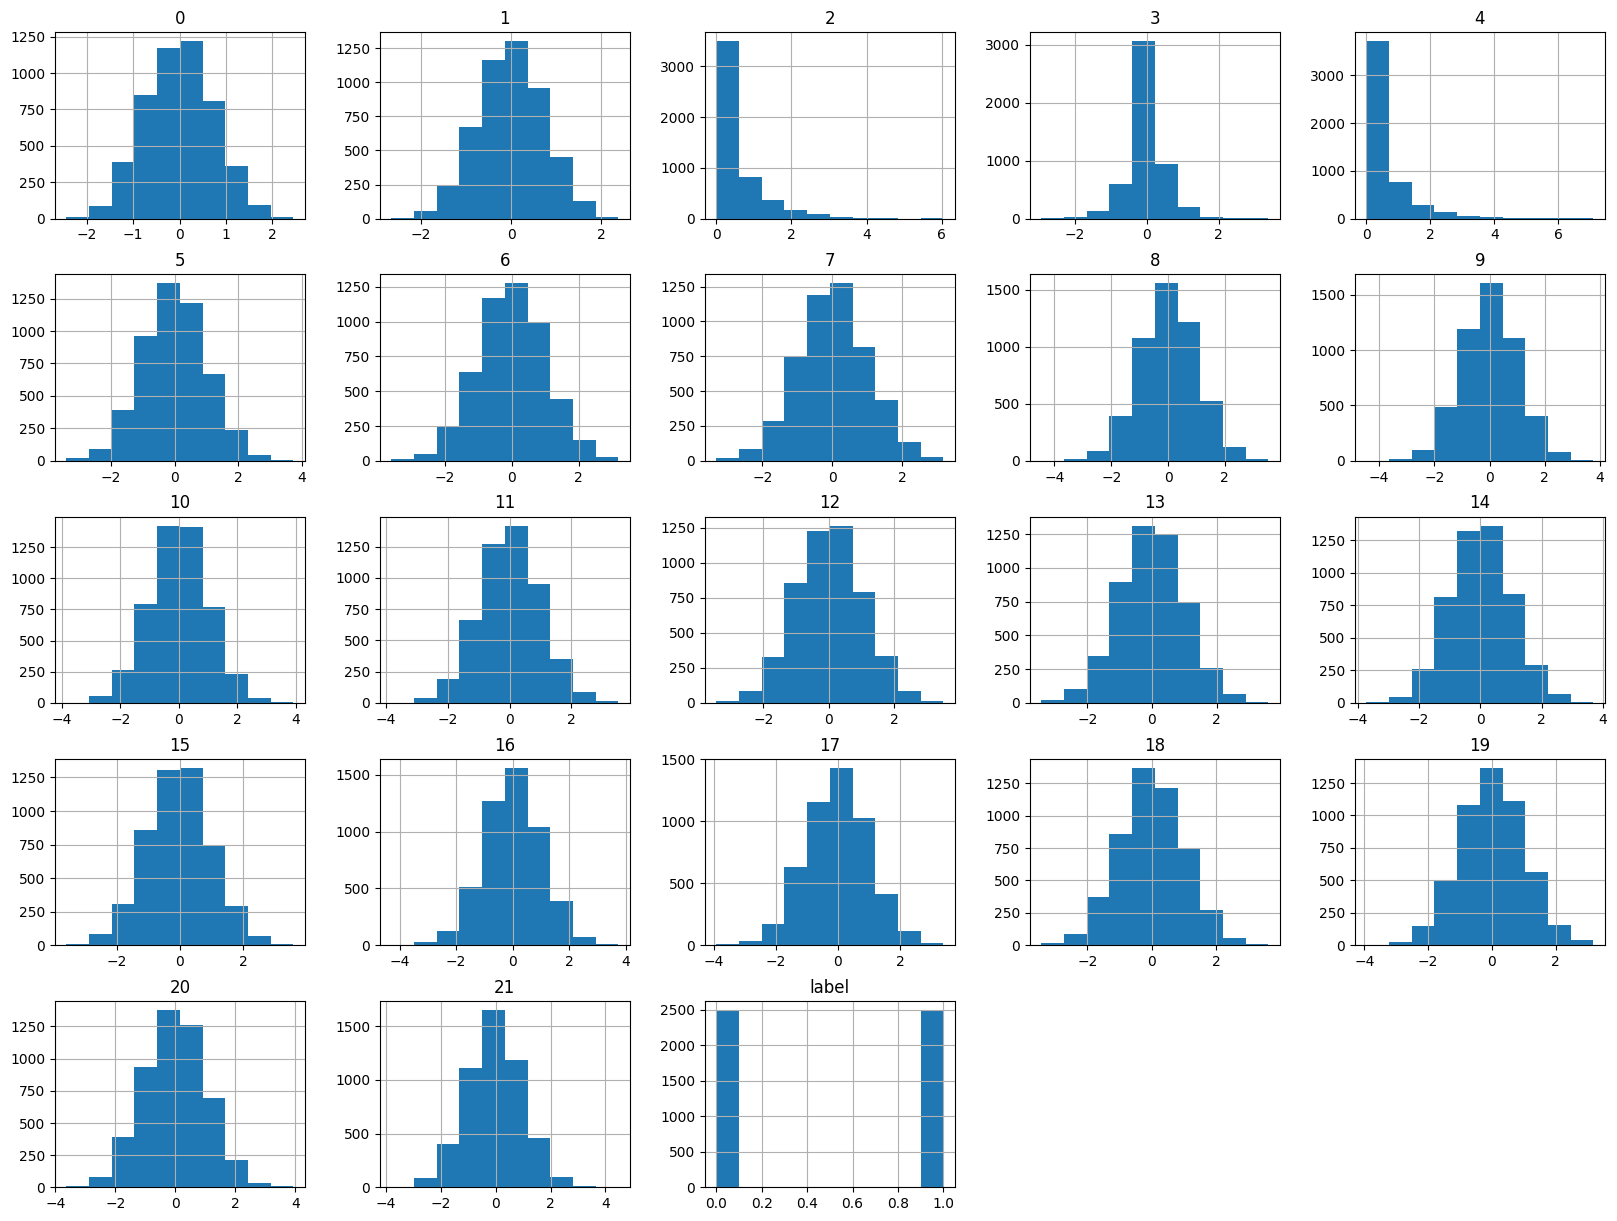

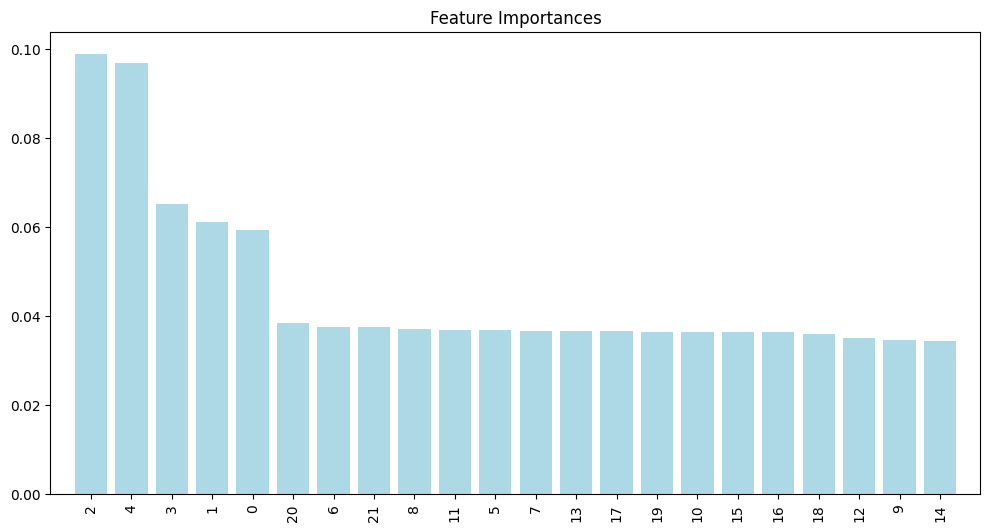

In [5]:
# Load your dataset
df = pd.read_csv("Dataset1.csv")

# 1. Data Distribution
df.hist(figsize=(20,15))
plt.show()

# 2. Feature Importance
# Create a RandomForestClassifier with a fixed random seed for reproducibility
rf = RandomForestClassifier(random_state=42)

# Fit the RandomForestClassifier to the data by providing features (all columns except 'label') and the target variable ('label')
rf.fit(df.drop('label', axis=1), df['label'])

# Calculate feature importances using the trained classifier
importances = rf.feature_importances_

# Sort the feature importances in descending order and store the corresponding indices
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(df.shape[1]-1), importances[indices], color='lightblue', align='center')
plt.xticks(range(df.shape[1]-1), df.columns[indices], rotation=90)
plt.xlim([-1, df.shape[1]-1])
plt.show()


**DATASET2**


In [6]:

# Initialize random seed to ensure reproducible results
np.random.seed(42)

# Create a dataset that is linearly separable
X_separable, y_separable = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                               n_clusters_per_class=1, class_sep=2, random_state=42)

# Create a dataset with a circular pattern
X_circular_pattern, y_circular_pattern = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Merge the linear and circular datasets
X_mixed = np.vstack((X_separable, X_circular_pattern))
y_mixed = np.hstack((y_separable, y_circular_pattern))

# Introduce noise to make classification with SVM more difficult
X_mixed += np.random.normal(loc=0, scale=0.2, size=X_mixed.shape)

# Prepare the mixed dataset for further operations
df_mixed = pd.DataFrame(X_mixed, columns=["feature_1", "feature_2"])
df_mixed['label'] = y_mixed

# Export the dataset with added noise to a CSV file, without altering the file name
df_mixed.to_csv("Dataset2.csv", index=False)


**EDA**

In [7]:
df_mixed.head()

,feature_1,feature_2,label
0,2.107798,-2.074663,0
1,1.455559,1.807147,1
2,1.977374,-2.843970,0
3,1.437723,0.212858,0
4,0.945205,1.490881,1


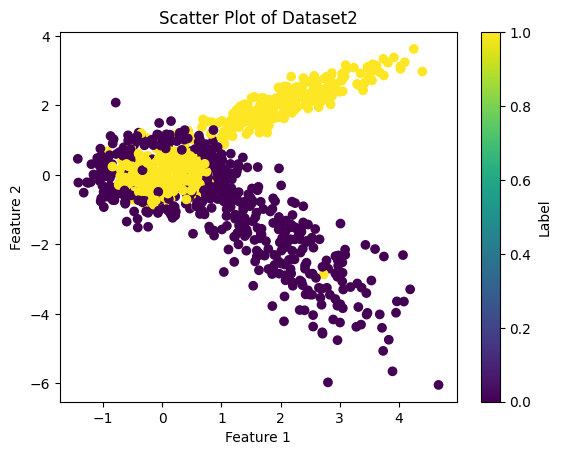

In [8]:
#Visalising dataset2 using scatter plot since it has only two features dimenionality reduction not required
plt.scatter(df_mixed['feature_1'], df_mixed['feature_2'], c=df_mixed['label'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset2')
plt.colorbar(label='Label')
plt.show()


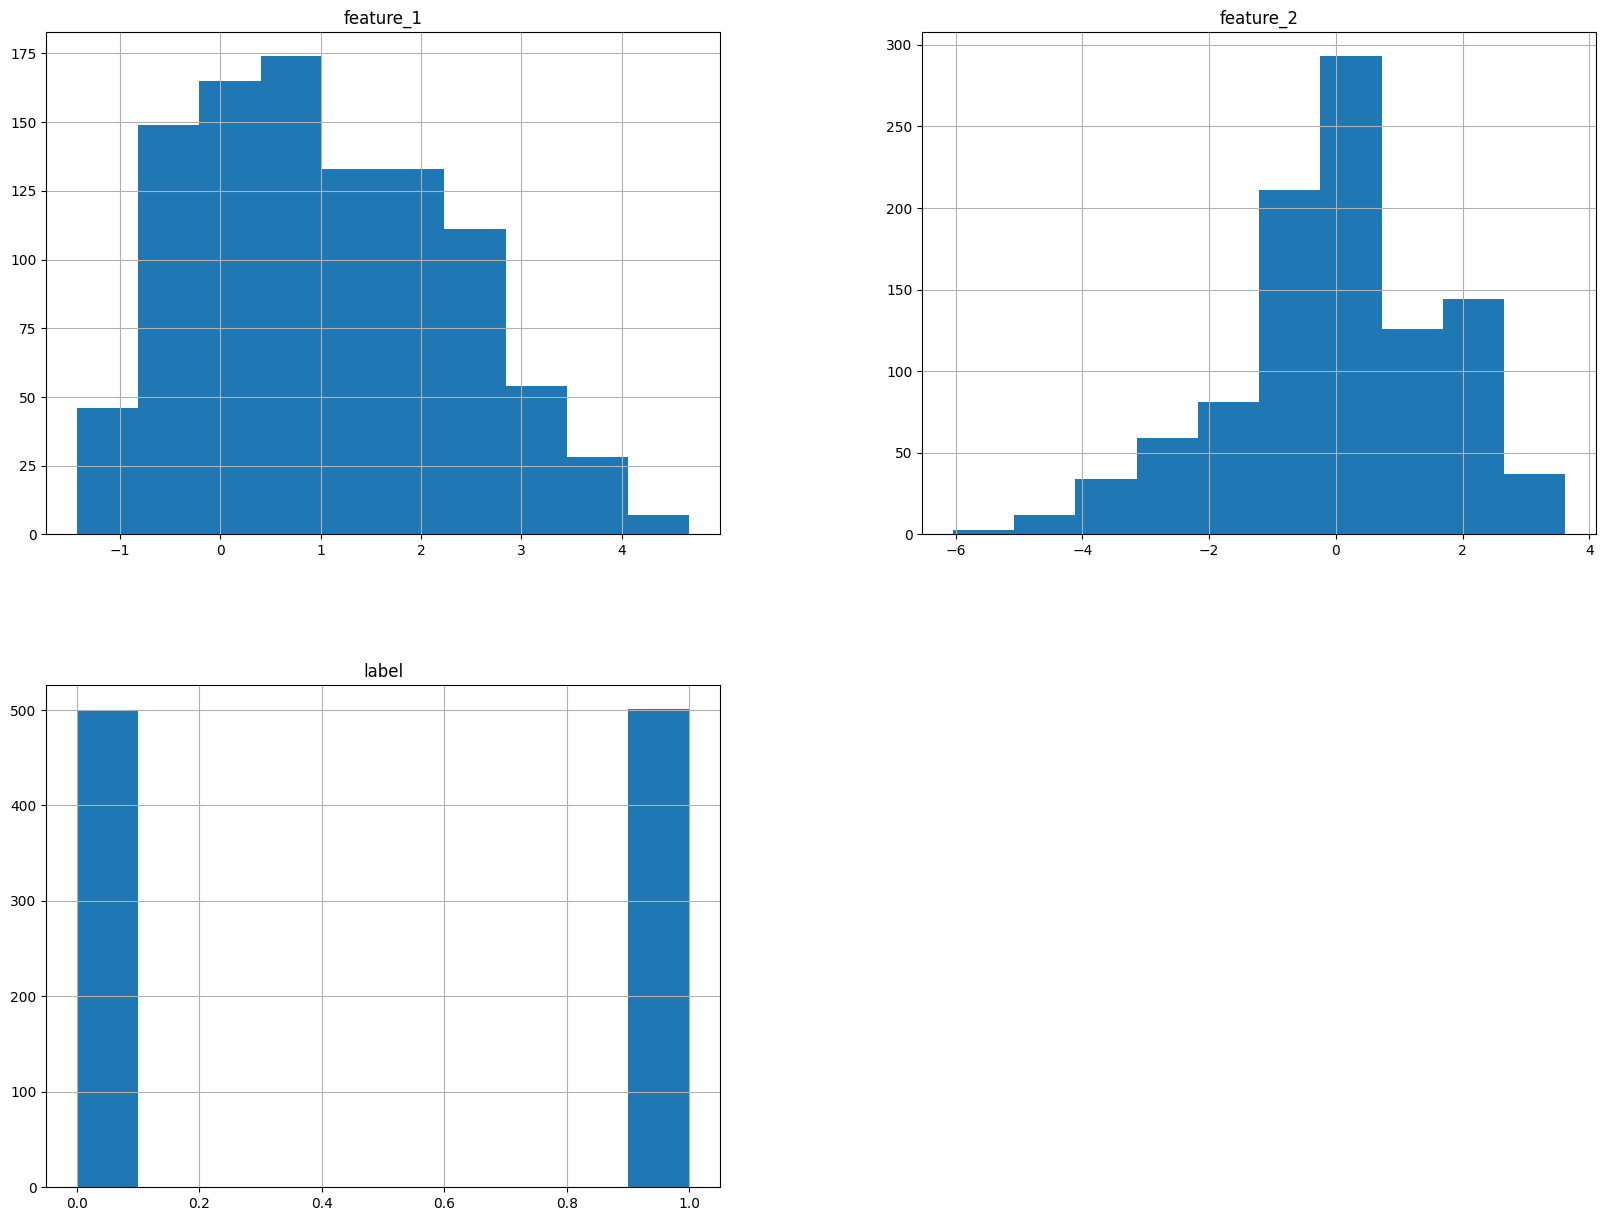

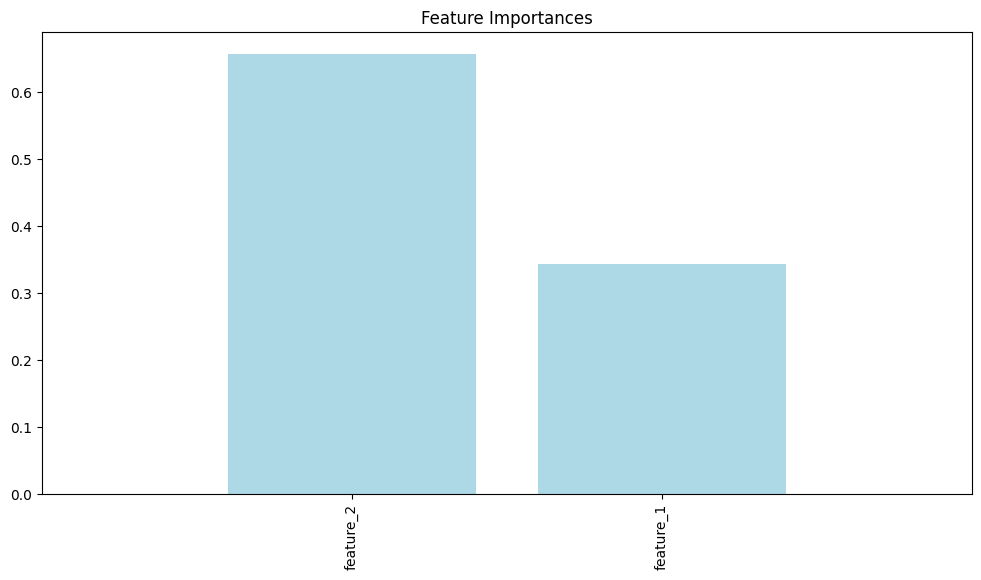

In [9]:
# Load your dataset
df = pd.read_csv("Dataset2.csv")

# 1. Data Distribution
df.hist(figsize=(20,15))
plt.show()

# 2. Feature Importance
# Create a RandomForestClassifier with a fixed random seed for reproducibility
rf = RandomForestClassifier(random_state=42)

# Fit the RandomForestClassifier to the data by providing features (all columns except 'label') and the target variable ('label')
rf.fit(df.drop('label', axis=1), df['label'])

# Calculate feature importances using the trained classifier
importances = rf.feature_importances_

# Sort the feature importances in descending order and store the corresponding indices
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(df.shape[1]-1), importances[indices], color='lightblue', align='center')
plt.xticks(range(df.shape[1]-1), df.columns[indices], rotation=90)
plt.xlim([-1, df.shape[1]-1])
plt.show()


In [10]:
seed = 42  # Seed for reproducibility

# Read the datasets from CSV files
df1 = pd.read_csv("/content/Dataset1.csv")
df2 = pd.read_csv("/content/Dataset2.csv")

# Prepare the data and labels
X1 = df1.drop('label', axis=1).values
y1 = df1['label'].values
X2 = df2.drop('label', axis=1).values
y2 = df2['label'].values


# Initialize the StandardScaler
scaler = StandardScaler()

# Preprocess the data for Dataset 1
X1_scaled = scaler.fit_transform(X1)  # Scale features

# Preprocess the data for Dataset 2
X2_scaled = scaler.fit_transform(X2)  # Scale features



# Initialize the Logistic Regression and K-Nearest Neighbors classifiers with default parameters
log_reg = LogisticRegression(max_iter=1000, random_state=seed)
knn = KNeighborsClassifier()

# Evaluate the classifiers on the first dataset
f1_log_reg_1 = cross_val_score(log_reg, X1, y1, cv=5, scoring='f1_macro').mean()
f1_knn_1 = cross_val_score(knn, X1, y1, cv=5, scoring='f1_macro').mean()

# Evaluate the classifiers on the second dataset
f1_log_reg_2 = cross_val_score(log_reg, X2, y2, cv=5, scoring='f1_macro').mean()
f1_knn_2 = cross_val_score(knn, X2, y2, cv=5, scoring='f1_macro').mean()

# Output the results
print(f"Dataset 1 - Logistic Regression F1: {f1_log_reg_1}, KNN F1: {f1_knn_1}")
print(f"Dataset 2 - Logistic Regression F1: {f1_log_reg_2}, KNN F1: {f1_knn_2}")
print("Difference in F1-score on Dataset 1:", f1_log_reg_1 - f1_knn_1)
print("Difference in F1-score on Dataset 2:", f1_knn_2 - f1_log_reg_2)


Dataset 1 - Logistic Regression F1: 0.6876564267464265, KNN F1: 0.572268344255791
Dataset 2 - Logistic Regression F1: 0.7260173805075636, KNN F1: 0.8989040663863049
Difference in F1-score on Dataset 1: 0.11538808249063548
Difference in F1-score on Dataset 2: 0.17288668587874134


KNN is highly sensitive to the scale of features because it uses distance calculations. Features on larger scales can dominate the outcome.
Logistic Regression can also benefit from feature scaling, especially when using solvers that are gradient descent-based.
Use of StandardScaler will scale the features  to have a mean of 0 and a standard deviation of 1, which is suitable for both algorithms.

#Datasets for the Decision Tree and Logistic Regression

**DATASET1**

In [11]:
np.random.seed(42)  # For reproducibility

# Linearly separable part
X1, y1 = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, flip_y=0.05, class_sep=2, random_state=42)

# Non-linear part (moons and circles) with feature expansion
poly = PolynomialFeatures(degree=5)
X2, y2 = make_moons(n_samples=500, noise=0.2, random_state=42)
X2 = poly.fit_transform(X2)[:, :20]  # Limit to first 20 features

X3, y3 = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
X3 = poly.fit_transform(X3)[:, :20]  # Limit to first 20 features

# Gaussian quantiles with feature expansion
X4, y4 = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=2, random_state=42)
X4 = poly.fit_transform(X4)[:, :20]  # Limit to first 20 features

# Combine and shuffle
X_combined = np.vstack((X1, X2, X3, X4))
y_combined = np.hstack((y1, y2, y3, y4))
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Standardize features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Convert to DataFrame and save
df_svm_favorable = pd.DataFrame(X_combined_scaled, columns=[f'feature_{i}' for i in range(X_combined_scaled.shape[1])])
df_svm_favorable['label'] = y_combined
df_svm_favorable.to_csv("Dataset_1.csv", index=False)


**EDA**

In [12]:
df_svm_favorable.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,label
0,0.474779,0.685969,-1.043909,0.485676,-0.592812,-0.085792,0.208859,-0.441453,-0.085114,-0.351044,...,-0.196143,-0.423073,-0.064325,-0.157497,-0.010881,-0.104440,-0.088383,-0.068442,-0.004149,0
1,0.474779,2.043445,-0.194770,3.250728,1.086561,-0.178596,4.072267,1.714536,-0.032504,-0.258242,...,2.017321,-0.121100,0.075511,-0.168148,3.404034,1.844976,0.349777,0.063757,-0.008797,1
2,0.474779,-1.252154,-0.121855,0.407236,-0.487580,-0.129084,-0.372614,0.309385,-0.407422,-0.238604,...,-0.138204,-0.469948,-0.039382,-0.163246,-0.092697,0.033359,-0.205997,-0.002590,-0.028574,0
3,0.789539,-1.058210,0.586076,-1.106663,1.108808,1.448399,0.073398,-0.401730,-1.137227,-0.279184,...,1.048272,0.277270,-0.200874,-0.091297,-0.232687,0.127765,0.525109,-0.093877,-0.164061,1
4,0.474779,0.769355,-0.982798,0.591165,-0.560718,-0.133644,0.295731,-0.452674,-0.116853,-0.329187,...,-0.219436,-0.438302,-0.044607,-0.163772,0.012639,-0.121267,-0.090334,-0.059673,-0.009800,0


ValueError: ignored

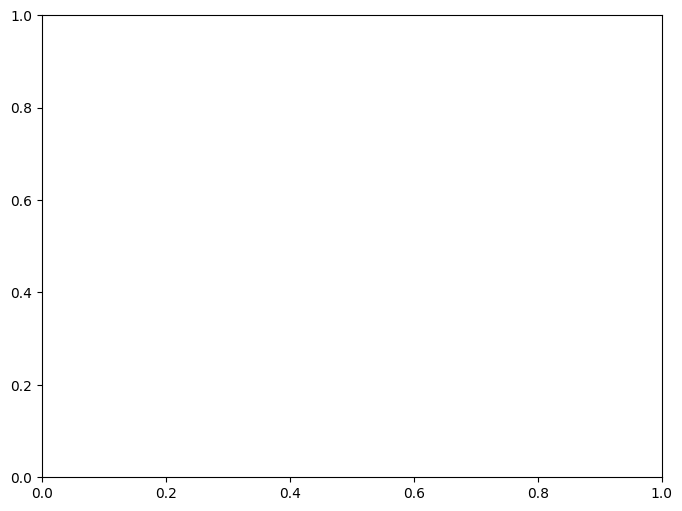

In [13]:
# Initialize t-SNE and reduce the dimension of the expanded dataset
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_combined_scaled)

# Visualize the t-SNE-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("t-SNE Visualization of Expanded Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()


In [14]:


np.random.seed(42)

# Increase number of samples and noise in moons dataset
X_moons, y_moons = make_moons(n_samples=20000, noise=0.5, random_state=42)

# Introduce high-dimensional noise
noise_features = np.random.rand(X_moons.shape[0], 100)  # Increase to 100 noise features

# Feature expansion to increase dimensionality
poly = PolynomialFeatures(degree=3)
X_moons_poly = poly.fit_transform(X_moons)

# Combine moons data with noise
X_combined = np.hstack((X_moons_poly, noise_features))
y_combined = y_moons  # Use moons labels

# Shuffle the combined dataset
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Convert to DataFrame and save
df_knn_challenging = pd.DataFrame(X_combined, columns=[f'feature_{i}' for i in range(X_combined.shape[1])])
df_knn_challenging['label'] = y_combined
df_knn_challenging.to_csv("Dataset_2.csv", index=False)


In [15]:
df_knn_challenging.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,label
0,1.0,-0.445744,0.602480,0.198687,-0.268552,0.362982,-0.088564,0.119705,-0.161797,0.218689,...,0.802589,0.015685,0.620431,0.188833,0.081203,0.462248,0.363963,0.745875,0.873882,0
1,1.0,1.203474,-0.405727,1.448349,-0.488282,0.164614,1.743051,-0.587635,0.198109,-0.066789,...,0.051017,0.454929,0.563220,0.213548,0.281123,0.931868,0.212487,0.510502,0.871274,1
2,1.0,-1.268711,0.336900,1.609628,-0.427428,0.113501,-2.042154,0.542283,-0.144000,0.038239,...,0.432885,0.355994,0.628984,0.202326,0.193424,0.001576,0.264568,0.586967,0.782496,0
3,1.0,1.218607,-0.011725,1.485002,-0.014288,0.000137,1.809634,-0.017411,0.000168,-0.000002,...,0.806051,0.686318,0.653805,0.726301,0.421250,0.413863,0.351261,0.160267,0.362422,1
4,1.0,0.837824,-1.148519,0.701950,-0.962258,1.319097,0.588111,-0.806203,1.105171,-1.515008,...,0.915793,0.483630,0.430197,0.667180,0.775092,0.396982,0.527140,0.718232,0.777832,1


In [16]:


seed = 42  # Define your seed variable for reproducibility

# Read the datasets from CSV files
df1 = pd.read_csv("/content/Dataset_1.csv")
df2 = pd.read_csv("/content/Dataset_2.csv")

# Prepare the data and labels
X1 = df1.drop('label', axis=1).values
y1 = df1['label'].values
X2 = df2.drop('label', axis=1).values
y2 = df2['label'].values

# Initialize the Decision Tree and Logistic Regression classifiers with default parameters
dt = DecisionTreeClassifier(random_state=seed)
log_reg = LogisticRegression(max_iter=1000, random_state=seed)

# Evaluate the classifiers on the first dataset
f1_dt_1 = cross_val_score(dt, X1, y1, cv=5, scoring='f1_macro').mean()
f1_log_reg_1 = cross_val_score(log_reg, X1, y1, cv=5, scoring='f1_macro').mean()

# Evaluate the classifiers on the second dataset
f1_dt_2 = cross_val_score(dt, X2, y2, cv=5, scoring='f1_macro').mean()
f1_log_reg_2 = cross_val_score(log_reg, X2, y2, cv=5, scoring='f1_macro').mean()

# Output the results
print(f"Dataset 1 - Decision Tree F1: {f1_dt_1}, Logistic Regression F1: {f1_log_reg_1}")
print(f"Dataset 2 - Decision Tree F1: {f1_dt_2}, Logistic Regression F1: {f1_log_reg_2}")
print("Difference in F1-score on Dataset 1:", f1_dt_1 - f1_log_reg_1)
print("Difference in F1-score on Dataset 2:", f1_log_reg_2 - f1_dt_2)


Dataset 1 - Decision Tree F1: 0.8439388537249644, Logistic Regression F1: 0.8075614552337962
Dataset 2 - Decision Tree F1: 0.7396989076017585, Logistic Regression F1: 0.8210985860931157
Difference in F1-score on Dataset 1: 0.03637739849116817
Difference in F1-score on Dataset 2: 0.08139967849135721
